(1797, 64)


<Figure size 432x288 with 0 Axes>

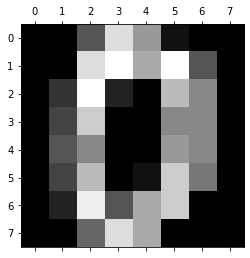

<Figure size 432x288 with 0 Axes>

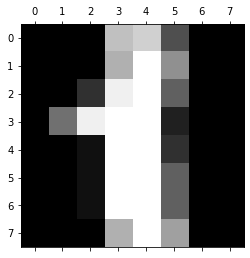

<Figure size 432x288 with 0 Axes>

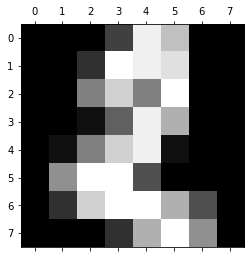

<Figure size 432x288 with 0 Axes>

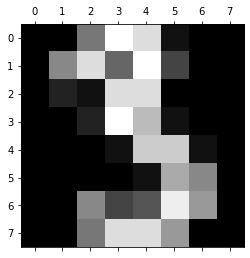

<Figure size 432x288 with 0 Axes>

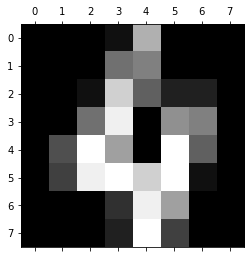

<Figure size 432x288 with 0 Axes>

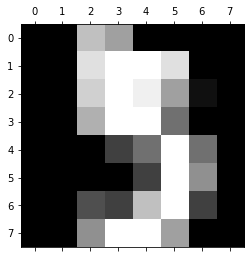

<Figure size 432x288 with 0 Axes>

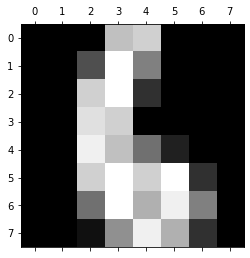

<Figure size 432x288 with 0 Axes>

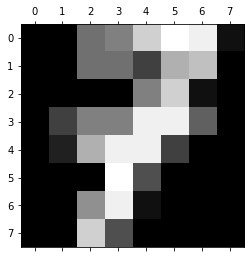

<Figure size 432x288 with 0 Axes>

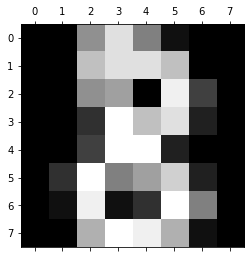

<Figure size 432x288 with 0 Axes>

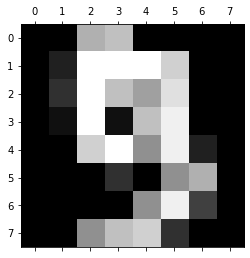

In [13]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt 
import numpy as np


# load digits dataset
digits = load_digits()
print(digits.data.shape)

# print top 10 images. 
for item in range(10):
    plt.gray() 
    plt.matshow(digits.images[item])
    plt.show() 

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn import metrics # for the check the error and accuracy of the model

#now split our data into train and test
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.2, random_state=0)
print(x_train.shape)
print(x_test.shape)

logistic = LogisticRegression()
logistic.fit(x_train,y_train)

temp=logistic.predict(x_test)
print('LogisticRegression accuracy : ')
print(metrics.accuracy_score(temp,y_test)) # to check the accuracy

(1437, 64)
(360, 64)
LogisticRegression accuracy : 
0.9666666666666667


c:\users\akshaysh\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
import pandas as pd
from sklearn.decomposition import PCA

existing_df = digits.data
pca = PCA(30) #
pca.fit(existing_df)

PCA(copy=True, iterated_power='auto', n_components=30, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [16]:
pca.explained_variance_ratio_.cumsum()

array([0.14890594, 0.28509365, 0.40303959, 0.48713938, 0.54496353,
       0.59413263, 0.6372925 , 0.67390623, 0.70743871, 0.73822677,
       0.76195018, 0.78467714, 0.80289578, 0.82063433, 0.83530534,
       0.84940249, 0.86258838, 0.87506976, 0.88524694, 0.89430311,
       0.90319847, 0.9111697 , 0.91884459, 0.92607358, 0.93303246,
       0.93899315, 0.94474929, 0.94990056, 0.95479407, 0.95907902])

No of components required to reach 95% of the variance is - 30


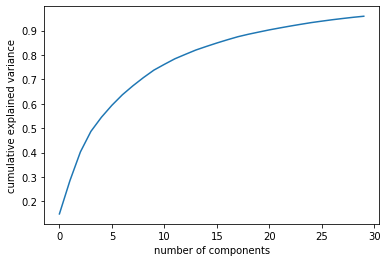

In [17]:
#print (pca.explained_variance_ratio_)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

print('No of components required to reach 95% of the variance is - 30')

In [18]:
transformed_df = pca.transform(existing_df)
target_existing_df = digits.target

print(transformed_df.shape)
print(target_existing_df.shape)

#now split our data into train and test
x_train, x_test, y_train, y_test = train_test_split(transformed_df, target_existing_df, test_size = 0.2)

logistic = LogisticRegression()
logistic.fit(x_train,y_train)

predictions =logistic.predict(x_test)
score = metrics.accuracy_score(predictions ,y_test) # to check the accuracy
print('LogisticRegression with PCA accuracy : ')
print(score) 

print('LogisticRegression accuracy is almost same with and without PCA')

(1797, 30)
(1797,)
LogisticRegression with PCA accuracy : 
0.9638888888888889
LogisticRegression accuracy is almost same with and without PCA


c:\users\akshaysh\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


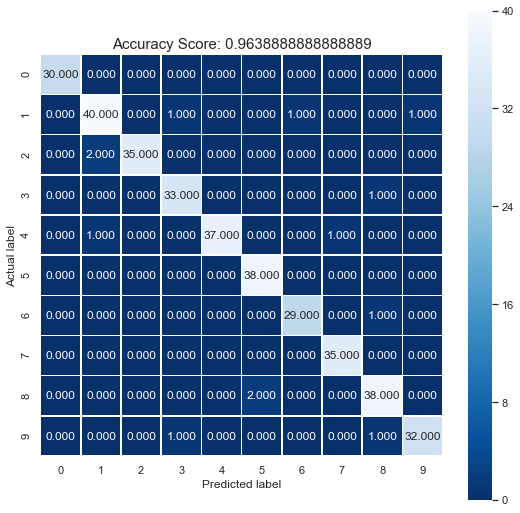

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions)
#print(cm)

plt.figure(figsize=(9,9))

sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');

plt.ylabel('Actual label');
plt.xlabel('Predicted label');

all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);